# "Being Basic"
> "Sometimes.....regression is life"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [linear regression]
- image: https://media.giphy.com/media/xUOwG5IshvzNMdzR72/giphy.gif

### How would I introduce someone into data science???
- Respect and understand the basics
- Be comfortable with interpreting math notation and coding the equations
- Understand the importance of visualization and how to properly visualize data 
- When using a library try to understand what it's doing

When initially getting into data science it can be overwhelming at first with the amount of information and models available. I can understand why someone would want to jump straight into building a deep neural network but in order to properly achieve those tasks I believe it's imperative to understand the basics and to have a sound foundation. I'm all for jumping right in and coding but you'll eventually need to circle back and interpret what you coded. This is a post describing how I would introduce a friend into the data science field. I think having an understanding of some basic algorithms is a great foundation to learning new algorithms and models. 

Copy my notes here if you want some more detail on the topics in this post: https://www.notion.so/ISL-Intro-to-Statistical-Learning-69b6f6bcc4984d438eb8d489e384bf3c

In [14]:
from __future__ import annotations

import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 

import torch

In [15]:
dataset = Path('/Users/davidpendleton/Documents/Coding/ISLR/data')

In [16]:
dataset

PosixPath('/Users/davidpendleton/Documents/Coding/ISLR/data')

In [17]:
advertising_ds = Path(dataset, 'Advertising.csv')

In [18]:
ad_ds = pd.read_csv(advertising_ds, usecols=['TV', 'radio', 'newspaper', 'sales'])

### The Dataset 
The dataset is a "toy set" from the Introduction to Statistical Learning book by James, Witten, Hastie and Tibshirani. The book is a great introduction for those looking to have a more statistical mindset when working with models. Their book "The Elements of Statistical Learning" is a lot more math heavy but the two books basically cover the same topics but with a variation in depth.

The dataset is a representation of a corporation's advertising budgets and their overall sales. The various columns (TV, newspaper and radio) represent the various methods the corporation spends their advertising while the sales column is the overall amount of sales for that instance. 

In [19]:
ad_ds

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Regression is the first step
There's no way around it, for me personally, if anyone wanted to understand data science and get into the field they need to revist and understand regression. Yes, that regression we learned in middle school, it lays the foundation for understanding some of machine learning's most used models. In this case we will start with linear regression (univariate - or one variable in this post and multivariable in another post). 

#### Univariet Linear Regression: $y = mx + b$ 
This is an equation commonly used to explain the slope and bias of a line. I personally prefer $y = \beta_1 * x + \beta_0$. Very commonly you'll see various books/websites use various variable representation for the same equation. It's imperative to notice these things

The task of regression is to determine the proper weight value, $\beta_1$, and bias value, $\beta_0$. This is the same goal in multivariable linear regression....and neural networks (I'll get there in a bit) but the way of getting those values is different.

### Lets do the boring stuff before the fun part: OLS
Ordinary least squares (OLS) is a method to determine the weight and bias values in the linear regression problem. The goal of OLS is to determine the weight and bias values that will minimize error, this is the goal for most machine learning models. This is a common goal for a number of machine learning methods. Basically the method finds the middle of all the points to minimize the error for the fitted line. 

*Why are we finding the center between all the points?* 
Because minimizing the error (or maximizing the accuracy) is the name of the game for every model you make today and in the future. Getting the center of the points, in the linear regression case, is where the error will be minimal, while still generalizing the model. 

### Converting math notation to code
One of the things I initially struggled with years ago when starting my masters was interpreting the equations in papers to code. I think it's a bit of a skill that of course can be developed the more comfortable you get with it. The equation we're going to work through is one of the easier ones you'd see but it's a good start or reminder of how to convert a math equation into code.

The equations for OLS to solve $beta_1$ and $beta_0$ are the following: \
\
$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \hat{x})(y_i - \hat{y})}{\sum_{i-1}^{n}(x_i - \hat{x})^2}$ \
\
$\beta_0 = \hat{y} - \beta_1 * \hat{x}$ ,
where $\hat{y}$ and $\hat{x}$ are the sample means (averages) of the x (input variable) and the y (target variable)

We can calculate the mean for x and y to use in the equations

In [20]:
y_sample = np.sum(ad_ds['sales'])/len(ad_ds['sales'])

In [21]:
x_sample = np.sum(ad_ds['TV'])/len(ad_ds['TV'])

In [22]:
y_sample, x_sample

(14.0225, 147.0425)

Calculating $beta_1$

In [23]:
beta_1 = np.sum((ad_ds['TV'].values - x_sample)*(ad_ds['sales'].values - y_sample))/\
np.sum(np.square((ad_ds['TV'].values - x_sample)))

Calculating $beta_0$

In [24]:
beta_0 = y_sample - (beta_1*x_sample)

In [25]:
print (f'beta 0: {beta_0}\nbeta 1: {beta_1}')

beta 0: 7.0325935491276965
beta 1: 0.047536640433019736


### Fit the data 
We can now use the values we've calculated for $beta_1$ and $beta_0$. We simply use vector multiplication to multiply the TV ad input data with the "slope" or $\beta_1$ and add the bias, $\beta_0$

In [26]:
#beta 0 is the bias
#beta 1 is the slope
y_pred = beta_0 + beta_1 * ad_ds['TV']

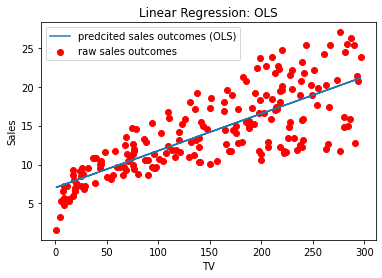

In [29]:
plt.title("Linear Regression: OLS")
plt.scatter(ad_ds['TV'], ad_ds['sales'], color='red', label='raw sales outcomes')
plt.plot(ad_ds['TV'], y_pred, label='predcited sales outcomes (OLS)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

We can measure the error of our fitted line by measuring the residual sum of squares (RSS). The RSS does not have a predefined range and is dependent on the scale on the y value. 

In [30]:
RSS = np.sum(np.square(ad_ds['sales'] - (beta_0 + beta_1*ad_ds['TV'])))

In [31]:
RSS

2102.5305831313512

We can give a little better context to the fit of the line by also calculating the $R^2$ value
\
The $R^2$ value is a fraction of the model variance over the dependant variable variance. It is not a metric to conclude how well our model fits the data

In [24]:
TSS = np.sum(np.square(ad_ds['sales'] - ad_ds['sales'].mean()))

In [25]:
r_squared = 1 - (RSS/TSS)

In [26]:
r_squared

0.611875050850071

The collapsed cell gives a brief overview how we can use plots to validate we've found the best weight and bias value. The following plot displays a sweep of the slope values and the RSS values for those slope values. The 'red dot' represents the slope values our least squares equation determined and the RSS value which we can see is the minimum. Plotting is very imperative in data science and everyone has their preference but I show a few different ways to show the sweep of values

### Using PyTorch
This might be over kill but having a complete understanding of regression is a great introduction to understanding neural networks (in my opinion). Coupled with my desire to make PyTorch my new primary library for neural network models, I want to try and complete these models with PyTorch tensors.

This is a brief method I usually use when learning a new language or library. I complete a simple script where I know the expected output. This gives me a good insight to the variations in libraries and how I can produce the same output. I want to repeat the fit of the data with PyTorch

The data fit is completed in three various methods:
1. OLS with PyTorch Tensors
2. Manual gradient descent with PyTorch 
3. Using PyTorch's gradient descent 
4. Using a perceptron in PyTorch

1. Ordinary Least Squares with PyTorch Tensors

This is a very straight forward approach. The equations are the same as the OLS example above but with PyTorch tensors

The tensor shape is: torch.Size([200, 2])


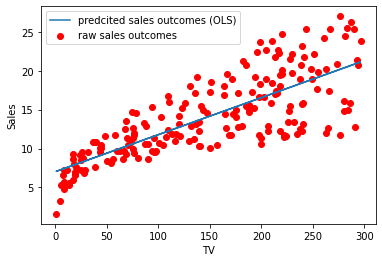

In [34]:
#collapse
#lets read in these values as tensors from the dataframe
torch_tensor = torch.tensor(ad_ds[['TV', 'sales']].values)

#tensors can also be read in from numpy arrays
torch_tensor

print (f"The tensor shape is: {torch_tensor.shape}")

#lets calculate the sample mean for the two variables
x_samp = torch_tensor[:, 0].mean()

y_samp = torch_tensor[:, 1].mean()

beta_1_least = torch.sum((torch_tensor[:, 0] - x_samp)*(torch_tensor[:, 1] - y_samp)) / torch.sum(((torch_tensor[:, 0] - x_samp)**2))
beta_0_least = (y_samp - (beta_1 * x_samp))

y_pred = torch_tensor[:, 0] * beta_1 + beta_0

plt.plot(torch_tensor[:, 0], y_pred, label='predcited sales outcomes (OLS)')
plt.scatter(torch_tensor[:, 0], torch_tensor[:, 1], c='red', label='raw sales outcomes')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

### Using PyTorch with Gradient Descent
Instead of using the least squares method, lets look at the gradient descent method with PyTorch. Before we can jump into working with PyTorch for a model, its important to understand how it reaches the same answer as an OLS method when using gradient descent. Having a good understanding of gradient descent and how it works by hand will help you down the road when working with other backpropogation methods such as Adam, stoichastic gradient descent and others.

Gradient descent is a weight adjustment method that uses a cost function and a learning rate to iteratively update the weights to minimize error. The cost function is the measure of error, this is what we are trying to minimize. We can use the derivative of the cost function to update our weights because the derivate provides the direction of minimum error. 

The cost function is $Cost = \sum_{i=1}^{n}(y_i - prediction)^2$ and its derivative is calculated using a partial derivative for the variables of interest which would be $\beta_1$ and $\beta_0$. The partial derivatives are solved using the chain and product rule from calculus to get the following equations:
\
\
$\frac{\partial{Cost}}{\partial{\beta_0}} = 2 * (y_i - prediction)$
\
\
$\frac{\partial{Cost}}{\partial{\beta_1}} = 2 * (y_i - prediction) * x, $
\
The notes give some insight on the equation and the importance of the learning weight. The learning rate is used to control how fast we update the beta variables. 

Peak at my notes to see some more detail on gradient descent and how the learning rate affects the calculation of the weights: https://www.notion.so/ISL-Intro-to-Statistical-Learning-69b6f6bcc4984d438eb8d489e384bf3c

In [29]:
def gradient_descent(lr:float, x:torch.Tensor, 
                     y:torch.tensor, beta_0:float, beta_1:float) -> Tuple(float, float):
    """Run the gradient descent calculation 
    
    Parameters
    ----------
    lr: float
        The learning rate for the calculation update    
    x: torch.tensor
        A vector of tensors of the input values
    y: torch.tensor 
        A vector of tensors of the out variable 
    beta_0: float
        The beta_0 bias 
    beta_1: float
        The beta_1 weight
        
    Returns
    -------
    Tuple(float, float) 
        The bias, beta_0, and beta weight, beta_1, are returned
    """
    
    predictions = beta_1 * x + beta_0
    error = y - predictions
    beta_1 += torch.mean(error * x) * lr
    beta_0 += torch.mean(error) * lr
    return beta_0, beta_1

### The importance of controlling the rate of learning 
Learning rate is a paramter that is commonly explored and analyzed when developing a model. It's an important paramter in the model training phase because it not only helps control the updates of the calculations, it controls how fast your model learns. Set this learning rate too low and it will take a long time to converge (and likely to get stuck in some local minima), set the value too high and the gradient will explode! I'll show you what I mean in this section

#### Exploding Gradient
This happens when the learning rate is set too high and the weights are basically bouncing all over the place until they get too large to provide any significant contribution

In [64]:
#start with random beta weights and run for two batches 
beta_1 = torch.rand(1)
beta_0 = torch.rand(1)

beta_0_hist = []
beta_1_hist = []
# if the learning rate is too large the gradient explodes 
#this is likely because the data is not scaled so large swings in the gradient are observed

#set the learning rate to 0.001, 1e-3 and 1e-2 are common starting points for me
lr = 1e-3
#run the gradient descent for 50 epochs
#An epoch is the definition for a full update of all the data, we can look into batch updates later 
for x in range(0, 50):
    beta_0, beta_1 = gradient_descent(lr, torch_tensor[:, 0], 
                                      torch_tensor[:, 1],
                                      beta_0, beta_1)
    print (beta_0, beta_1)
    beta_0_hist.append(float(beta_0))
    beta_1_hist.append(float(beta_1))

tensor([0.4853]) tensor([-15.5756])
tensor([2.7891]) tensor([437.7644])
tensor([-61.5696]) tensor([-12235.9619])
tensor([1737.7124]) tensor([342075.])
tensor([-48563.5742]) tensor([-9563162.])
tensor([1357676.2500]) tensor([2.6735e+08])
tensor([-37955636.]) tensor([-7.4742e+09])
tensor([1.0611e+09]) tensor([2.0895e+11])
tensor([-2.9664e+10]) tensor([-5.8415e+12])
tensor([8.2931e+11]) tensor([1.6331e+14])
tensor([-2.3184e+13]) tensor([-4.5654e+15])
tensor([6.4815e+14]) tensor([1.2763e+17])
tensor([-1.8120e+16]) tensor([-3.5682e+18])
tensor([5.0657e+17]) tensor([9.9753e+19])
tensor([-1.4162e+19]) tensor([-2.7887e+21])
tensor([3.9591e+20]) tensor([7.7962e+22])
tensor([-1.1068e+22]) tensor([-2.1795e+24])
tensor([3.0943e+23]) tensor([6.0932e+25])
tensor([-8.6505e+24]) tensor([-1.7034e+27])
tensor([2.4184e+26]) tensor([4.7622e+28])
tensor([-6.7608e+27]) tensor([-1.3313e+30])
tensor([1.8901e+29]) tensor([3.7219e+31])
tensor([-5.2840e+30]) tensor([-1.0405e+33])
tensor([1.4772e+32]) tensor([2.9

Text(0.5, 0, 'Epoch')

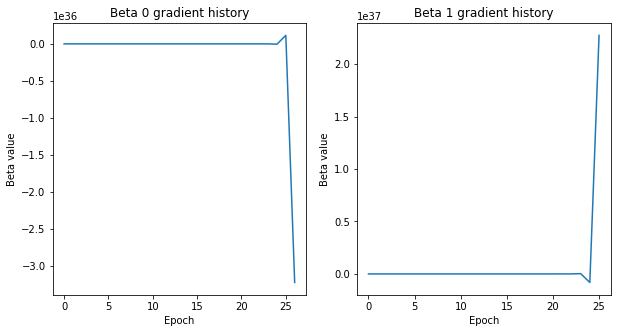

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(beta_0_hist)
ax1.title.set_text('Beta 0 gradient history')
ax1.set_ylabel('Beta value')
ax1.set_xlabel('Epoch')
ax2.plot(beta_1_hist)
ax2.title.set_text('Beta 1 gradient history')
ax2.set_ylabel('Beta value')
ax2.set_xlabel('Epoch')

The beta values get so large we start procuding nan values...something is definitely wrong with the current gradient descent method

Lets decrease the learning rate and see what happens...

In [87]:
#start with random beta weights and run for two batches 
beta_1 = torch.rand(1)
beta_0 = torch.rand(1)

beta_0_hist = []
beta_1_hist = []
# if the learning rate is too small the gradient takes forever to update

#set the learning rate to 1e-5
lr = 2e-5
#run the gradient descent for 50 epochs
#An epoch is the definition for a full update of all the data, we can look into batch updates later 
for x in range(0, 1000):
    beta_0, beta_1 = gradient_descent(lr, torch_tensor[:, 0], 
                                      torch_tensor[:, 1],
                                      beta_0, beta_1)
    print (beta_0, beta_1)
    beta_0_hist.append(float(beta_0))
    beta_1_hist.append(float(beta_1))

tensor([0.9655]) tensor([0.1387])
tensor([0.9653]) tensor([0.1038])
tensor([0.9653]) tensor([0.0890])
tensor([0.9653]) tensor([0.0829])
tensor([0.9653]) tensor([0.0802])
tensor([0.9653]) tensor([0.0791])
tensor([0.9653]) tensor([0.0787])
tensor([0.9654]) tensor([0.0785])
tensor([0.9654]) tensor([0.0784])
tensor([0.9654]) tensor([0.0784])
tensor([0.9655]) tensor([0.0784])
tensor([0.9655]) tensor([0.0784])
tensor([0.9655]) tensor([0.0783])
tensor([0.9656]) tensor([0.0783])
tensor([0.9656]) tensor([0.0783])
tensor([0.9656]) tensor([0.0783])
tensor([0.9656]) tensor([0.0783])
tensor([0.9657]) tensor([0.0783])
tensor([0.9657]) tensor([0.0783])
tensor([0.9657]) tensor([0.0783])
tensor([0.9658]) tensor([0.0783])
tensor([0.9658]) tensor([0.0783])
tensor([0.9658]) tensor([0.0783])
tensor([0.9659]) tensor([0.0783])
tensor([0.9659]) tensor([0.0783])
tensor([0.9659]) tensor([0.0783])
tensor([0.9660]) tensor([0.0783])
tensor([0.9660]) tensor([0.0783])
tensor([0.9660]) tensor([0.0783])
tensor([0.9660

tensor([0.9732]) tensor([0.0783])
tensor([0.9732]) tensor([0.0783])
tensor([0.9732]) tensor([0.0783])
tensor([0.9733]) tensor([0.0783])
tensor([0.9733]) tensor([0.0783])
tensor([0.9733]) tensor([0.0783])
tensor([0.9734]) tensor([0.0783])
tensor([0.9734]) tensor([0.0783])
tensor([0.9734]) tensor([0.0783])
tensor([0.9734]) tensor([0.0783])
tensor([0.9735]) tensor([0.0783])
tensor([0.9735]) tensor([0.0783])
tensor([0.9735]) tensor([0.0783])
tensor([0.9736]) tensor([0.0783])
tensor([0.9736]) tensor([0.0783])
tensor([0.9736]) tensor([0.0783])
tensor([0.9737]) tensor([0.0783])
tensor([0.9737]) tensor([0.0783])
tensor([0.9737]) tensor([0.0783])
tensor([0.9738]) tensor([0.0783])
tensor([0.9738]) tensor([0.0783])
tensor([0.9738]) tensor([0.0783])
tensor([0.9738]) tensor([0.0783])
tensor([0.9739]) tensor([0.0783])
tensor([0.9739]) tensor([0.0783])
tensor([0.9739]) tensor([0.0783])
tensor([0.9740]) tensor([0.0783])
tensor([0.9740]) tensor([0.0783])
tensor([0.9740]) tensor([0.0783])
tensor([0.9741

tensor([0.9807]) tensor([0.0783])
tensor([0.9807]) tensor([0.0783])
tensor([0.9808]) tensor([0.0783])
tensor([0.9808]) tensor([0.0783])
tensor([0.9808]) tensor([0.0783])
tensor([0.9809]) tensor([0.0783])
tensor([0.9809]) tensor([0.0783])
tensor([0.9809]) tensor([0.0783])
tensor([0.9810]) tensor([0.0783])
tensor([0.9810]) tensor([0.0783])
tensor([0.9810]) tensor([0.0783])
tensor([0.9811]) tensor([0.0783])
tensor([0.9811]) tensor([0.0783])
tensor([0.9811]) tensor([0.0783])
tensor([0.9811]) tensor([0.0783])
tensor([0.9812]) tensor([0.0783])
tensor([0.9812]) tensor([0.0783])
tensor([0.9812]) tensor([0.0783])
tensor([0.9813]) tensor([0.0783])
tensor([0.9813]) tensor([0.0783])
tensor([0.9813]) tensor([0.0783])
tensor([0.9814]) tensor([0.0783])
tensor([0.9814]) tensor([0.0783])
tensor([0.9814]) tensor([0.0783])
tensor([0.9815]) tensor([0.0783])
tensor([0.9815]) tensor([0.0783])
tensor([0.9815]) tensor([0.0783])
tensor([0.9815]) tensor([0.0783])
tensor([0.9816]) tensor([0.0783])
tensor([0.9816

tensor([0.9909]) tensor([0.0782])
tensor([0.9910]) tensor([0.0782])
tensor([0.9910]) tensor([0.0782])
tensor([0.9910]) tensor([0.0782])
tensor([0.9911]) tensor([0.0782])
tensor([0.9911]) tensor([0.0782])
tensor([0.9911]) tensor([0.0782])
tensor([0.9912]) tensor([0.0782])
tensor([0.9912]) tensor([0.0782])
tensor([0.9912]) tensor([0.0782])
tensor([0.9913]) tensor([0.0782])
tensor([0.9913]) tensor([0.0782])
tensor([0.9913]) tensor([0.0782])
tensor([0.9913]) tensor([0.0782])
tensor([0.9914]) tensor([0.0782])
tensor([0.9914]) tensor([0.0782])
tensor([0.9914]) tensor([0.0782])
tensor([0.9915]) tensor([0.0782])
tensor([0.9915]) tensor([0.0782])
tensor([0.9915]) tensor([0.0782])
tensor([0.9916]) tensor([0.0782])
tensor([0.9916]) tensor([0.0782])
tensor([0.9916]) tensor([0.0782])
tensor([0.9917]) tensor([0.0782])
tensor([0.9917]) tensor([0.0782])
tensor([0.9917]) tensor([0.0782])
tensor([0.9917]) tensor([0.0782])
tensor([0.9918]) tensor([0.0782])
tensor([0.9918]) tensor([0.0782])
tensor([0.9918

The two plots below show the gradient descent progression for beta_0 and beta_1 with a learning rate of 1e-5 for 1000 epochs. In certain situations these parameters are fine but with the simplicity of this data it should not be this complex to determine the beta values. As we can see in the plots below, the two parameters are trending towards the values we know they need to converge to. There is a quicker way to converge these values which is imperative and a common preprocessing step for neural networks, SCALING. Oh and I actually did run this gradient descent just to see how long it would take to converge and its on the order of a million plus epochs (this is a no no for this simple of a problem!)

Text(0.5, 0, 'Epoch')

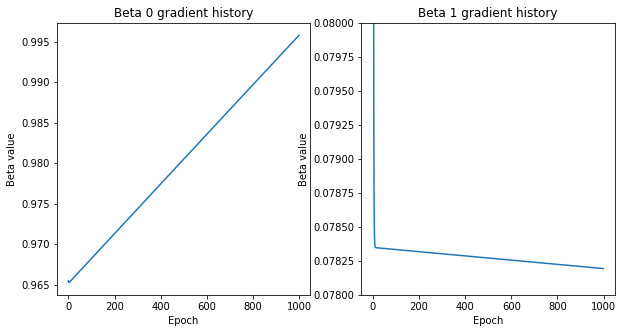

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(beta_0_hist)
ax1.title.set_text('Beta 0 gradient history')
ax1.set_ylabel('Beta value')
ax1.set_xlabel('Epoch')
ax2.plot(beta_1_hist)
ax2.title.set_text('Beta 1 gradient history')
ax2.set_ylim((0.078, 0.08))
ax2.set_ylabel('Beta value')
ax2.set_xlabel('Epoch')

### Scaling 
The reason for gradient descent being so sensitive to the learning rate we set was because the values to update the parameters were too sparse which caused a lot of variation in our values. This caused our gradient to explode. When setting the value too small, we were moving at a snails pace to actually converge to the global minimum values. We can solve this issue by making all our values used during gradient descent to get cozy and closer together so we aren't seeing large values when updating our beta values


I'm using a minmax scaling method where I set all the values between 0 and 1 using the minimum and maximum values of each variable

In [40]:
torch_tv_scaled = (torch_tensor[:, 0] - torch_tensor[:, 0].min()) / (torch_tensor[:, 0].max() - torch_tensor[:, 0].min())

torch_sales_scaled = (torch_tensor[:, 1] - torch_tensor[:, 1].min()) / (torch_tensor[:, 1].max() - torch_tensor[:, 1].min())

As you can see in the plots below the relationship between the independent and dependent variables are maintained, the data is simply scaled between 0 and 1. This will allow the gradient descent to train faster and not explode with a larger learning rate

It should also be reminded and noted, our OLS method determined the optimal value for beta_1 and beta_0 were 0.0475 and 7.0326. Since we scaled our dataset those values will not be what the scaled gradient descent will find.

Text(0.5, 0, 'TV Advertisement')

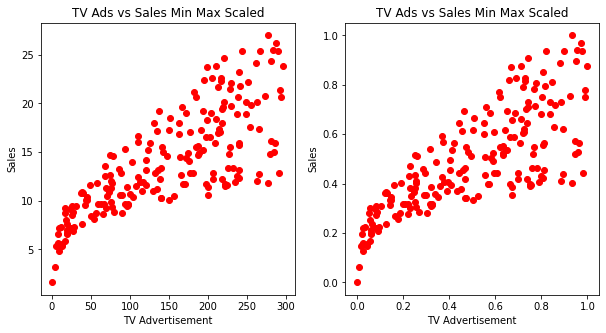

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(torch_tensor[:, 0], torch_tensor[:, 1], c='red')
ax1.title.set_text('TV Ads vs Sales')
ax1.set_ylabel('Sales')
ax1.set_xlabel('TV Advertisement')
ax2.scatter(torch_tv_scaled, torch_sales_scaled, c='red')
ax2.title.set_text('TV Ads vs Sales Min Max Scaled')
ax2.set_ylabel('Sales')
ax2.set_xlabel('TV Advertisement')

In [108]:
#start with random beta weights and run for two batches 
beta_1_scaled = torch.rand(1)
beta_0_scaled = torch.rand(1)

beta_0_hist = []
beta_1_hist = []

# learning rate is very slow and finds a local min
#this is likely because the data is not scaled so large swings in the gradient are observed

lr = 0.1
for x in range(0, 1000):
    beta_0_scaled, beta_1_scaled = gradient_descent(lr, torch_tv_scaled, 
                                      torch_sales_scaled,
                                      beta_0_scaled, beta_1_scaled)
    print (beta_0_scaled, beta_1_scaled)
    beta_0_hist.append(float(beta_0_scaled))
    beta_1_hist.append(float(beta_1_scaled))

tensor([0.6764]) tensor([0.5430])
tensor([0.6308]) tensor([0.5205])
tensor([0.5909]) tensor([0.5010])
tensor([0.5559]) tensor([0.4841])
tensor([0.5253]) tensor([0.4695])
tensor([0.4984]) tensor([0.4570])
tensor([0.4749]) tensor([0.4461])
tensor([0.4542]) tensor([0.4368])
tensor([0.4361]) tensor([0.4288])
tensor([0.4202]) tensor([0.4220])
tensor([0.4062]) tensor([0.4161])
tensor([0.3939]) tensor([0.4112])
tensor([0.3830]) tensor([0.4070])
tensor([0.3735]) tensor([0.4035])
tensor([0.3651]) tensor([0.4006])
tensor([0.3577]) tensor([0.3982])
tensor([0.3511]) tensor([0.3963])
tensor([0.3453]) tensor([0.3947])
tensor([0.3401]) tensor([0.3935])
tensor([0.3355]) tensor([0.3926])
tensor([0.3315]) tensor([0.3919])
tensor([0.3278]) tensor([0.3915])
tensor([0.3246]) tensor([0.3912])
tensor([0.3217]) tensor([0.3911])
tensor([0.3191]) tensor([0.3912])
tensor([0.3167]) tensor([0.3914])
tensor([0.3146]) tensor([0.3917])
tensor([0.3126]) tensor([0.3921])
tensor([0.3109]) tensor([0.3926])
tensor([0.3093

tensor([0.2223]) tensor([0.5399])
tensor([0.2223]) tensor([0.5400])
tensor([0.2222]) tensor([0.5401])
tensor([0.2222]) tensor([0.5402])
tensor([0.2221]) tensor([0.5403])
tensor([0.2221]) tensor([0.5404])
tensor([0.2221]) tensor([0.5405])
tensor([0.2220]) tensor([0.5406])
tensor([0.2220]) tensor([0.5406])
tensor([0.2219]) tensor([0.5407])
tensor([0.2219]) tensor([0.5408])
tensor([0.2218]) tensor([0.5409])
tensor([0.2218]) tensor([0.5410])
tensor([0.2217]) tensor([0.5411])
tensor([0.2217]) tensor([0.5411])
tensor([0.2217]) tensor([0.5412])
tensor([0.2216]) tensor([0.5413])
tensor([0.2216]) tensor([0.5414])
tensor([0.2215]) tensor([0.5415])
tensor([0.2215]) tensor([0.5415])
tensor([0.2214]) tensor([0.5416])
tensor([0.2214]) tensor([0.5417])
tensor([0.2214]) tensor([0.5418])
tensor([0.2213]) tensor([0.5419])
tensor([0.2213]) tensor([0.5419])
tensor([0.2212]) tensor([0.5420])
tensor([0.2212]) tensor([0.5421])
tensor([0.2212]) tensor([0.5422])
tensor([0.2211]) tensor([0.5422])
tensor([0.2211

tensor([0.2157]) tensor([0.5525])
tensor([0.2157]) tensor([0.5525])
tensor([0.2157]) tensor([0.5525])
tensor([0.2157]) tensor([0.5525])
tensor([0.2156]) tensor([0.5525])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5526])
tensor([0.2156]) tensor([0.5527])
tensor([0.2156]) tensor([0.5527])
tensor([0.2156]) tensor([0.5527])
tensor([0.2156]) tensor([0.5527])
tensor([0.2156]) tensor([0.5527])
tensor([0.2156

We can clearly see using a relatively larger learning rate, 0.1, and 1000 epochs we are able to see the beta_0 and beta_1 values converge to their values of 0.2153 and 0.5532 for the scaled dataset. The plot on the far right shows those converged values mapped to our scaled dataset, which is the same trend as the OLS solution

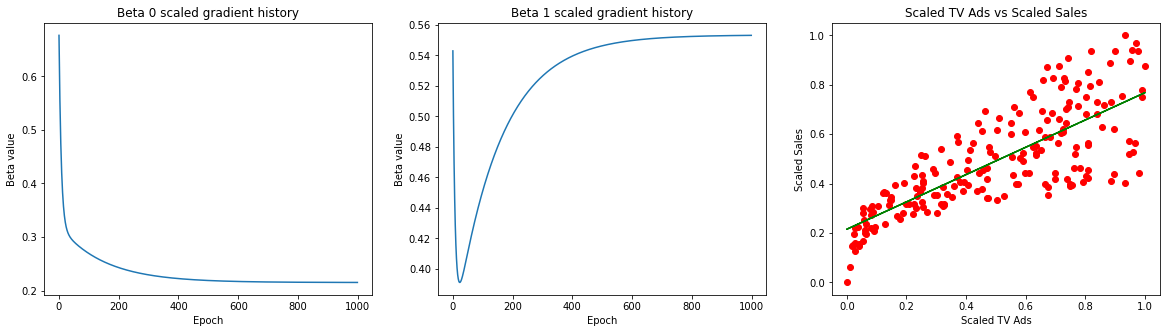

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.plot(beta_0_hist)
ax1.title.set_text('Beta 0 scaled gradient history')
ax1.set_ylabel('Beta value')
ax1.set_xlabel('Epoch')
ax2.plot(beta_1_hist)
ax2.title.set_text('Beta 1 scaled gradient history')
ax2.set_ylabel('Beta value')
ax2.set_xlabel('Epoch')
ax3.title.set_text('Scaled TV Ads vs Scaled Sales')
ax3.set_ylabel('Scaled Sales')
ax3.set_xlabel('Scaled TV Ads')
ax3.plot(torch_tv_scaled, torch_tv_scaled * beta_1_scaled + beta_0_scaled, c='green')
ax3.scatter(torch_tv_scaled, torch_sales_scaled, c='red')

In [109]:
beta_0_scaled, beta_1_scaled

(tensor([0.2153]), tensor([0.5532]))

If you'd like to get your dataset and predictions to their original scaling don't trip we can simply inverse the minmax equation we used to reset our dataset and our predicted values. Use the following inverse minmax equation:
$y_{pred} = (y_{scaled pred} * (max(sales) - min(sales))) + min(sales)$

In [123]:
y_scaled_pred = (torch_tv_scaled * beta_1_scaled + beta_0_scaled)*(torch_tensor[:, 1].max() - torch_tensor[:, 1].min()) + torch_tensor[:, 1].min() 

In [126]:
y_pred_least = torch_tensor[:, 0] * beta_1_least + beta_0_least

PRESTO! The scaled dataset is back to it's original form. The plot below also shows the OLS original fitted plot, can you see the difference....me neither. The two methods give the same outcome because they are both trying to minimze the error. The only difference is we can use this knowledge of gradient descent with neural networks!

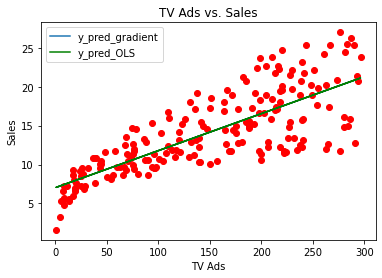

In [129]:
plt.plot(torch_tensor[:, 0], y_pred_least, label='y_pred_gradient')
plt.plot(torch_tensor[:, 0], y_scaled_pred, c='green', label = "y_pred_OLS")
plt.scatter(torch_tensor[:, 0], torch_tensor[:, 1], c='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.title('TV Ads vs. Sales')
plt.legend()

This gradient descent wasn't discussed in the Stats Learning book in reading but I thought the dots can be connected to show why imperative preprocessing such as scaling are used and how weights are updated using vectors. When someone learns these two things they can likely wrap their mind around the "magic" of a neural network

### Using PyTorch backprop

Below we go over how to use PyTorch's backpropagation for calculating the weight and bias for our sales data. I include some notes describing the code, feel free to peak at my notes (I won't tell)

In [29]:
criterion = torch.nn.MSELoss()

weight = torch.rand(1, dtype=torch.double).requires_grad_()
bias = torch.rand(1, dtype=torch.double, requires_grad=True)
    
def model(x):
    return x * weight + bias

lr = 2e-5
for epoch in range(100):
    data = torch_tensor[:, 0]

    outputs = model(data)

    loss = criterion(outputs, torch_tensor[:, 1])

    loss.backward()

    with torch.no_grad():
        weight -= weight.grad * lr
        bias -= bias.grad * lr
        weight.grad.zero_()
        bias.grad.zero_()

## Margin Notes:

![grad-descent-margin](./lin_reg_margin/pytorch_grad_desc.png)

In [30]:
criterion(model(torch_tensor[0, 0].unsqueeze(dim=0)), torch_tensor[0, 1])

/Users/davidpendleton/anaconda2/envs/deep-learning/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning:

Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



tensor(16.0875, dtype=torch.float64, grad_fn=<MseLossBackward>)

In [31]:
model(torch_tensor[0, 0].unsqueeze(dim=0))

tensor([18.0891], dtype=torch.float64, grad_fn=<AddBackward0>)

In [32]:
torch_tensor[0, 1]

tensor(22.1000, dtype=torch.float64)

In [33]:
weight, bias

(tensor([0.0511], dtype=torch.float64, requires_grad=True),
 tensor([6.3305], dtype=torch.float64, requires_grad=True))

### We can speed everything up by scaling the dataset 

In [42]:
weight = torch.rand(1, dtype=torch.double).requires_grad_()
bias = torch.rand(1, dtype=torch.double, requires_grad=True)
    
def model(x):
    return x * weight + bias

In [43]:
#all the margin notes above apply to this code
lr = .1
for epoch in range(1000):
    #using our min max scaled dataset
    data = torch_tv_scaled

    outputs = model(data)

    loss = criterion(outputs, torch_sales_scaled)

    loss.backward()

    #the optimizer in pyTorch replaces this portion of code
    with torch.no_grad():
        weight -= weight.grad * lr
        bias -= bias.grad * lr
        weight.grad.zero_()
        bias.grad.zero_()

In [58]:
weight, bias

(tensor([0.5534], dtype=torch.float64, requires_grad=True),
 tensor([0.2152], dtype=torch.float64, requires_grad=True))

In [56]:
pred = model(torch_tv_scaled.unsqueeze(dim=0))*(torch_tensor[:, 1].max() - torch_tensor[:, 1].min()) + torch_tensor[:, 1].min() 

### Using a perceptron

A neural network is comprised of perceptrons. The goal of training a neural network is to determine the weight and bias values for each individual perceptron. PyTorch allows a lot of the backpropagation to be handled with fewer lines of code. The example below reaches the same calculated values but with a defined perceptron and using PyTorch's optimizer code to backpropagate the perceptron for us. It's easy to update the model when it's a single perceptron but these tools come in handy when using a large neural network with hundreds of perceptrons. 

In [46]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [47]:
class perceptron(nn.Module):
    def __init__(self):
        super(perceptron, self).__init__()
        self.percep = nn.Linear(1, 1)
        
    def forward(self, data):
        return self.percep(data)
    
percept = perceptron()

In [48]:
print (percept)

perceptron(
  (percep): Linear(in_features=1, out_features=1, bias=True)
)


In [49]:
percept = percept.float()

In [50]:
optimizer = optim.SGD(percept.parameters(), lr=1e-3)

hist_loss = []

for i in range(0, 1000):
    optimizer.zero_grad()
    pred = percept(torch_tv_scaled.float().unsqueeze(-1))
    loss = criterion(pred, torch_sales_scaled.float().unsqueeze(-1))
    hist_loss.append(loss.item())
    loss.backward()
    optimizer.step()

In [51]:
preds = percept(torch_tv_scaled.float().unsqueeze(-1))*(torch_tensor[:, 1].max() - torch_tensor[:, 1].min()) + torch_tensor[:, 1].min() 

In [52]:
preds = preds.detach().numpy()

In [53]:
preds = preds.flatten()

## Here are all the OLS and gradient descent outputs we calculated

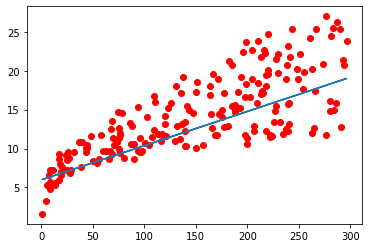

In [54]:
plt.scatter(torch_tensor[:, 0], torch_tensor[:, 1], c='red')
# plt.plot(torch_tensor[:, 0], y_pred, label='GD')
# plt.plot(torch_tensor[:, 0], y_pred_least, c='green', label='OLS')
plt.plot(torch_tensor[:, 0], preds, label='NN: 100 epochs')

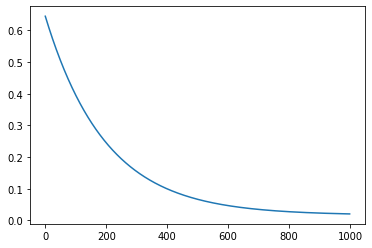

In [55]:
plt.plot(hist_loss)